In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Импортирование необходимых модулей и атрибутов
from sklearn import linear_model
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from matplotlib import pyplot
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error, mean_absolute_error
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from keras.wrappers.scikit_learn import KerasRegressor
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [2]:
df = pd.read_excel(r"C:\Users\55944\Desktop\888\data_iqr_2.xlsx")
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(5)

,Соотношение матрица-наполнитель,"Плотность, кг/м3","модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2","Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа","Прочность при растяжении, МПа","Потребление смолы, г/м2",Угол нашивки,Шаг нашивки,Плотность нашивки
0,1.857143,2030.0,738.736842,50.00,23.750000,284.615385,210.0,70.0,3000.0,220.0,0,4.0,60.0
1,1.857143,2030.0,738.736842,129.00,21.250000,300.000000,210.0,70.0,3000.0,220.0,0,5.0,47.0
2,2.771331,2030.0,753.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,57.0
3,2.767918,2000.0,748.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,60.0
4,2.569620,1910.0,807.000000,111.86,22.267857,284.615385,210.0,70.0,3000.0,220.0,0,5.0,70.0


In [3]:
columns = ['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа','Потребление смолы', 'Угол нашивки',
       'Шаг нашивки', 'Плотность нашивки','Прочность при растяжении, МПа']

In [4]:
df.columns

Index(['Соотношение матрица-наполнитель', 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки'],
      dtype='object')

In [5]:
x=df[[ 'Плотность, кг/м3',
       'модуль упругости, ГПа', 'Количество отвердителя, м.%',
       'Содержание эпоксидных групп,%_2', 'Температура вспышки, С_2',
       'Поверхностная плотность, г/м2', 'Модуль упругости при растяжении, ГПа',
       'Прочность при растяжении, МПа', 'Потребление смолы, г/м2',
       'Угол нашивки', 'Шаг нашивки', 'Плотность нашивки']]
# целевую переменную поместим в переменную y
y=df[['Соотношение матрица-наполнитель']]

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.3, 
                                                    random_state = 42)

# Построим простую линейную модель 1

In [7]:
normalizer = tf.keras.layers.Normalization(axis=-1)

In [8]:
normalizer.adapt(np.array(x))

In [9]:
model_1 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [10]:
model_1.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [11]:

history = model_1.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 3s 24ms/step - loss: 6.4692 - val_loss: 3.2980
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5264 - val_loss: 0.9627
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8816 - val_loss: 0.9008
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8692 - val_loss: 0.8337
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8517 - val_loss: 0.9136
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8561 - val_loss: 0.8651
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8878 - val_loss: 0.8525
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8808 - val_loss: 0.9731
Epoch 9/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8672 - val_loss: 0.8669
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8665 - val_loss: 0.8806
Epoch 11

In [12]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,val_loss,epoch
95,0.914181,0.994310,95
96,0.885819,0.848887,96
97,0.917376,0.971146,97
98,0.903369,0.940767,98
99,0.904427,0.899107,99


In [13]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

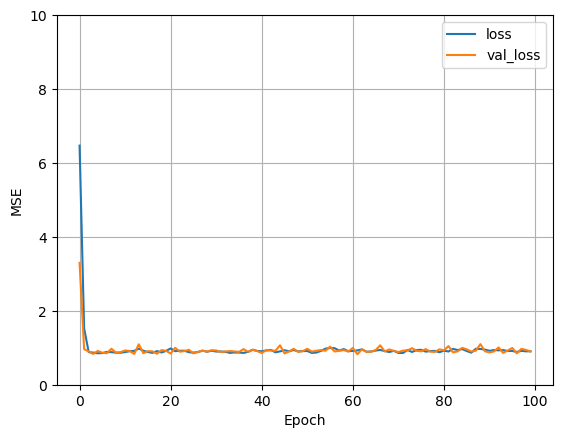

In [14]:
plot_loss(history)

In [15]:
y_pred_model_1 = model_1.predict(x_test)

9/9 [==============================] - 1s 2ms/step


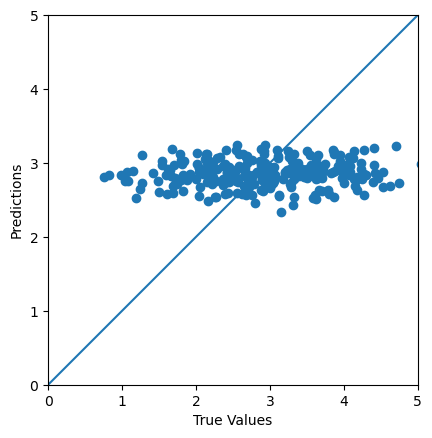

In [16]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


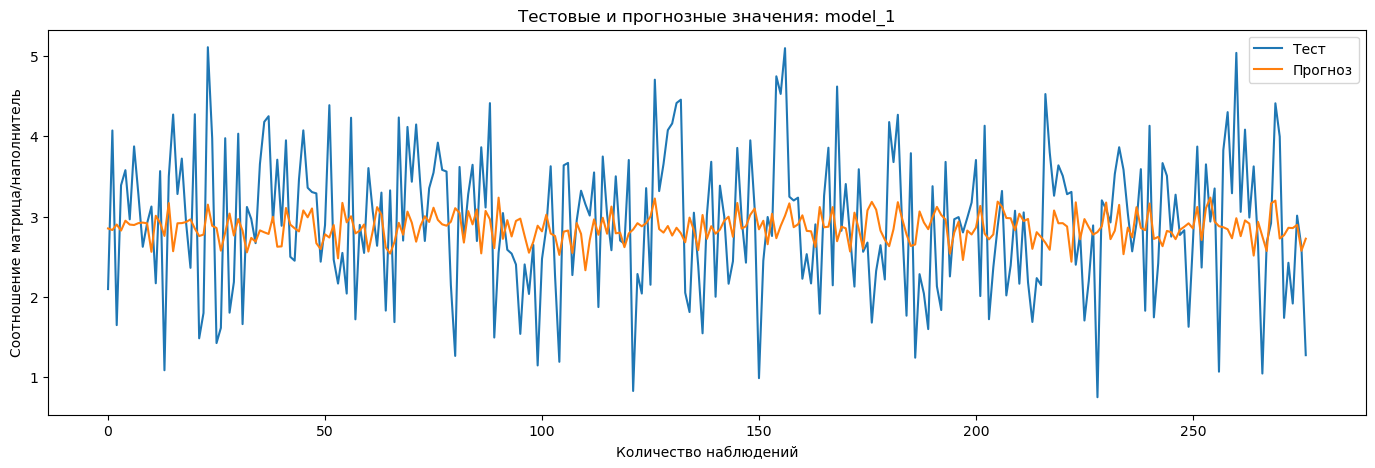

In [17]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_1')

#Зададим функцию для вывода метрик в виде таблицы

In [18]:
def error (model, x_train, x_test, y_train, y_test, name = 'Model name', trg = 'Целевой параметр'):
    mae_test = mean_absolute_error(y_test, model.predict(x_test))
    mse_test = mean_squared_error(y_test, model.predict(x_test))
    mae_train = mean_absolute_error(y_train, model.predict(x_train))
    mse_train = mean_squared_error(y_train, model.predict(x_train))
    R_Squared=  r2_score(y_test, model.predict(x_test))  
    
    df_error = pd.DataFrame({
        'model':[name],
        'Target param':trg,
        'MAE(test)':mae_test,
        'MAE(train)':mae_train,
        'MSE(test)':mse_test,
        'MSE(train)':mse_train,
        'R_Squared': R_Squared
})
    return df_error

In [19]:
df_1 = error(model_1, x_train, x_test, y_train, y_test,
       name = 'model_1', trg = 'Соотношение матрица-наполнитель')
df_1

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.718846,0.72798,0.769704,0.832339,-0.006862


# Построим простую линейную модель_2 с теми же параметрами, но включим функцию callbacks

In [20]:
# вводим функцию CALLBACKS(остановка обучения когда  целевой показатель перестает улучшаться) 
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, 
                                                     verbose=1, restore_best_weights=True)
def callbacks(pat = 10):
    callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, 
                                                     verbose=1, restore_best_weights=True)
    return callback

In [21]:

model_2 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [22]:
model_2.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error')

In [23]:
%%time
history = model_2.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)


Epoch 1/100
17/17 [==============================] - 0s 7ms/step - loss: 6.6594 - val_loss: 2.9646
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 1.5476 - val_loss: 1.0602
Epoch 3/100
17/17 [==============================] - 0s 2ms/step - loss: 0.9035 - val_loss: 0.9089
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8957 - val_loss: 0.8824
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8550 - val_loss: 0.8828
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 0.9115 - val_loss: 0.9074
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8638 - val_loss: 0.8776
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8542 - val_loss: 0.8789
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8998 - val_loss: 0.9021
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8747 - val_loss: 0.8825
Epoch 11/

In [24]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

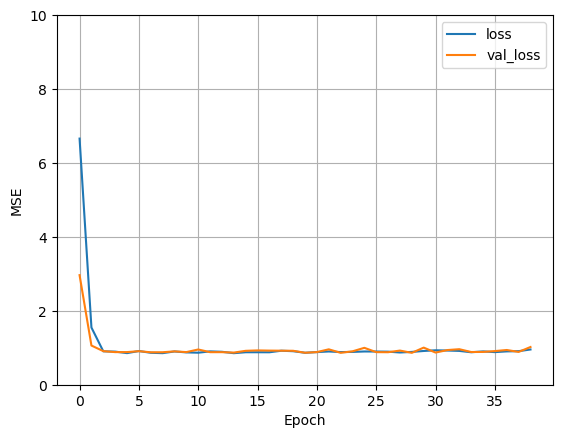

In [25]:
plot_loss(history)

In [26]:
y_pred_model_2 = model_2.predict(x_test)

9/9 [==============================] - 0s 2ms/step


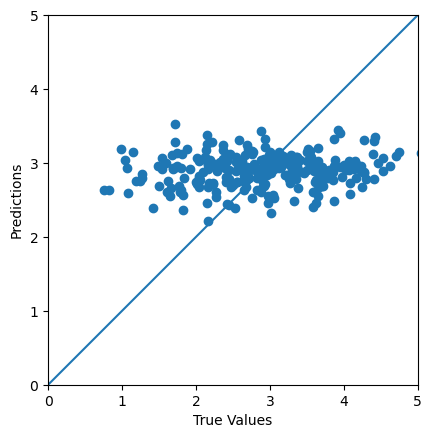

In [27]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


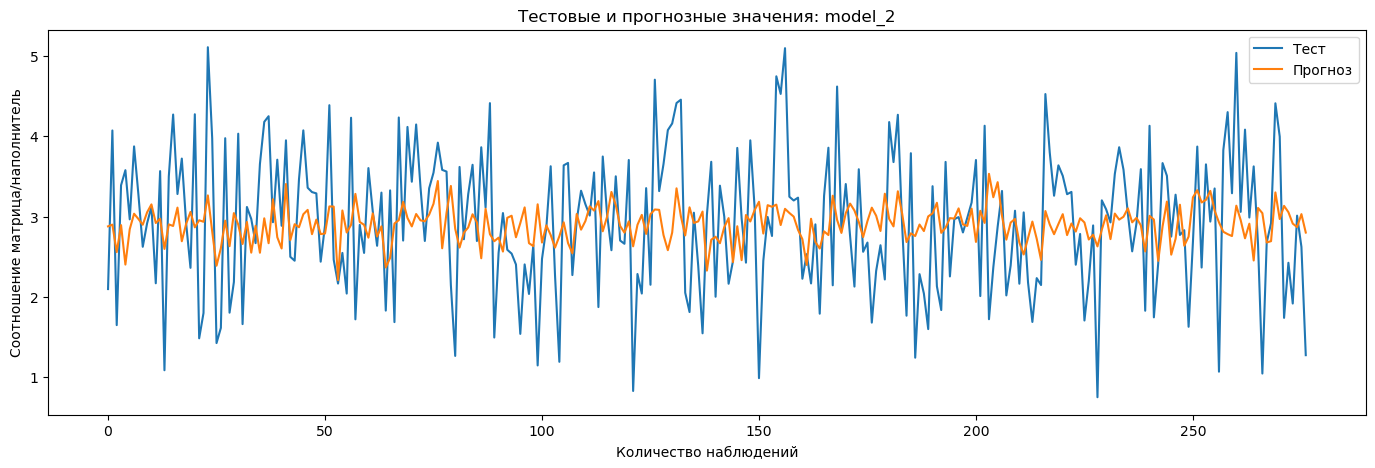

In [28]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_2.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_2')

In [29]:
df_2 = error(model_2, x_train, x_test, y_train, y_test,
       name = 'model_2', trg = 'Соотношение матрица-наполнитель')
df_2

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_2,Соотношение матрица-наполнитель,0.711121,0.741844,0.756206,0.854804,0.010795


# Построим простую линейную модель с теми же параметрами, но изменим оптимизатор на SGD

In [30]:
model_3 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [31]:
model_3.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.1),
    loss='mean_squared_error')

In [32]:
%%time
history = model_3.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 0s 8ms/step - loss: 2.7424 - val_loss: 0.9859
Epoch 2/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8596 - val_loss: 1.0545
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8788 - val_loss: 0.9254
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8733 - val_loss: 0.9551
Epoch 5/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8604 - val_loss: 1.0071
Epoch 6/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8612 - val_loss: 0.9417
Epoch 7/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8536 - val_loss: 1.0414
Epoch 8/100
17/17 [==============================] - 0s 2ms/step - loss: 0.8612 - val_loss: 1.0788
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8805 - val_loss: 0.8980
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 0.8413 - val_loss: 1.1327
Epoch 11/

In [33]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

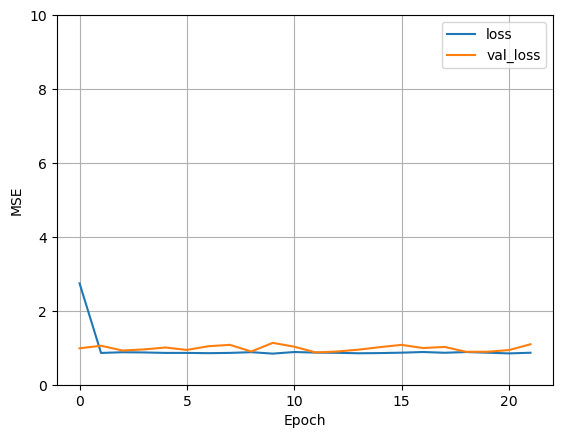

In [34]:
plot_loss(history)

In [35]:
y_pred_model_3 = model_3.predict(x_test)

9/9 [==============================] - 0s 2ms/step


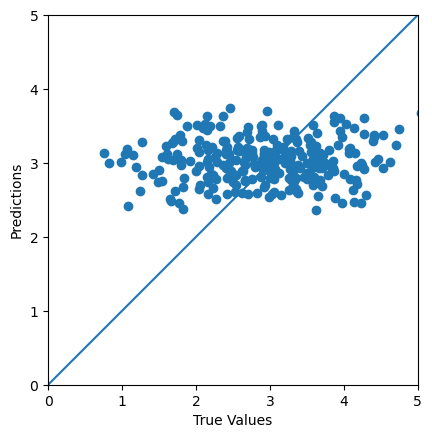

In [36]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 1ms/step


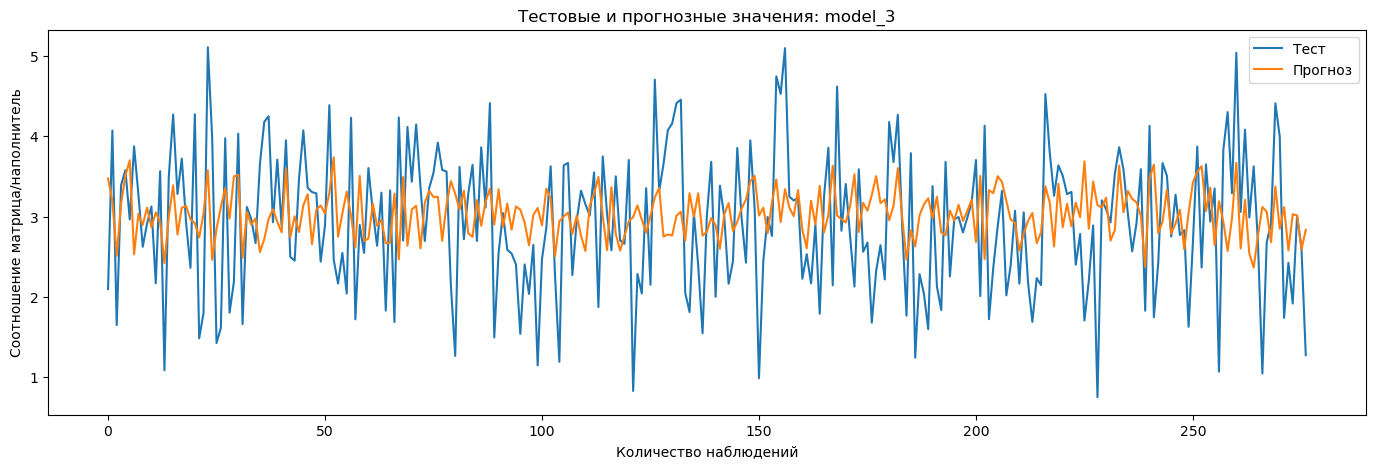

In [37]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_3.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_3')

In [38]:
df_3 = error(model_3, x_train, x_test, y_train, y_test,
       name = 'model_3', trg = 'Соотношение матрица-наполнитель')
df_3

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_3,Соотношение матрица-наполнитель,0.746268,0.75142,0.828954,0.881878,-0.084367


# Построим простую линейную модель с теми же параметрами, но изменим оптимизатор на RMSprop

In [39]:
model_4 = tf.keras.Sequential([
    normalizer,
    layers.Dense(units=1)
])
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_3 (Dense)             (None, 1)                 13        
                                                                 
Total params: 38
Trainable params: 13
Non-trainable params: 25
_________________________________________________________________


In [40]:
model_4.compile(
    optimizer=tf.optimizers.RMSprop(learning_rate=0.01),
    loss='mean_squared_error')

In [41]:
%%time
history = model_4.fit(
    x_train,
    y_train,
    epochs=100,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/100
17/17 [==============================] - 1s 19ms/step - loss: 9.9180 - val_loss: 8.6530
Epoch 2/100
17/17 [==============================] - 0s 3ms/step - loss: 8.2423 - val_loss: 7.5846
Epoch 3/100
17/17 [==============================] - 0s 3ms/step - loss: 7.1031 - val_loss: 6.6473
Epoch 4/100
17/17 [==============================] - 0s 3ms/step - loss: 6.1435 - val_loss: 5.8350
Epoch 5/100
17/17 [==============================] - 0s 2ms/step - loss: 5.3009 - val_loss: 5.1581
Epoch 6/100
17/17 [==============================] - 0s 3ms/step - loss: 4.5842 - val_loss: 4.5356
Epoch 7/100
17/17 [==============================] - 0s 3ms/step - loss: 3.9440 - val_loss: 3.9675
Epoch 8/100
17/17 [==============================] - 0s 3ms/step - loss: 3.3874 - val_loss: 3.4732
Epoch 9/100
17/17 [==============================] - 0s 3ms/step - loss: 2.9014 - val_loss: 3.0082
Epoch 10/100
17/17 [==============================] - 0s 3ms/step - loss: 2.4654 - val_loss: 2.5389
Epoch 11

In [42]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

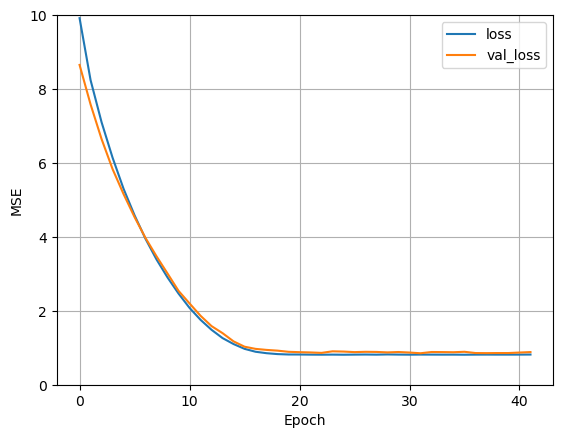

In [43]:
plot_loss(history)

In [44]:
y_pred_model_4 = model_4.predict(x_test)

9/9 [==============================] - 0s 2ms/step


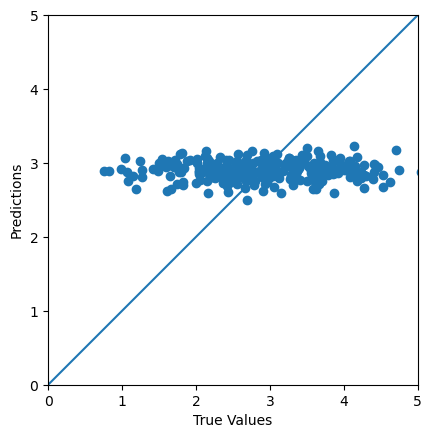

In [45]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_model_4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


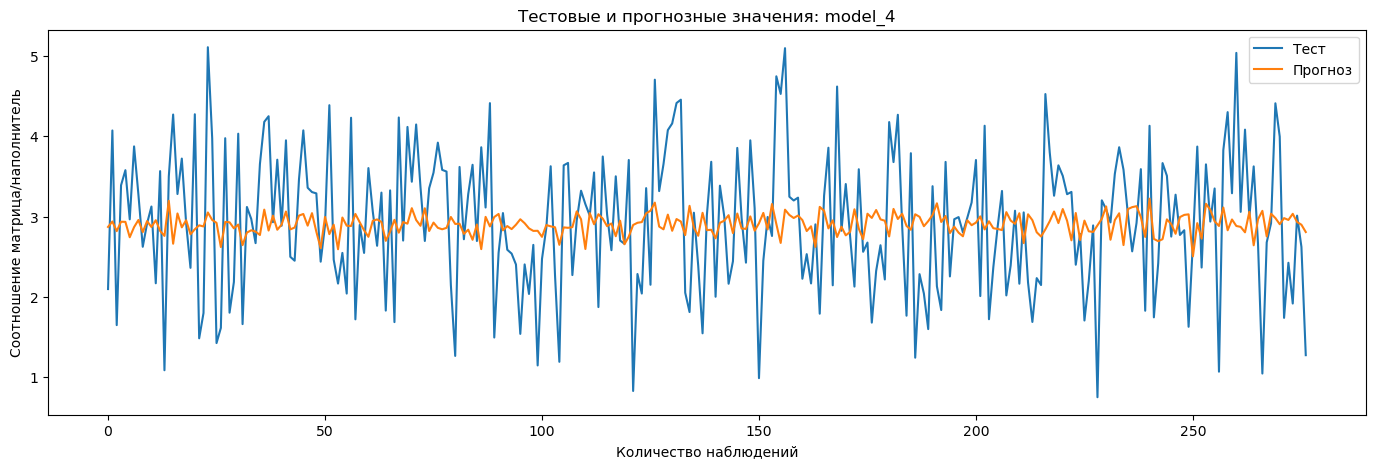

In [46]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, model_4.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'model_4')

In [47]:
df_4 = error(model_4, x_train, x_test, y_train, y_test,
       name = 'model_4', trg = 'Соотношение матрица-наполнитель')
df_4

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_4,Соотношение матрица-наполнитель,0.715961,0.71926,0.775988,0.809827,-0.015082


In [48]:
df_result = pd.concat([df_1, df_2, df_3, df_4], axis=0).reset_index(drop = True)
df_result

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.718846,0.727980,0.769704,0.832339,-0.006862
1,model_2,Соотношение матрица-наполнитель,0.711121,0.741844,0.756206,0.854804,0.010795
2,model_3,Соотношение матрица-наполнитель,0.746268,0.751420,0.828954,0.881878,-0.084367
3,model_4,Соотношение матрица-наполнитель,0.715961,0.719260,0.775988,0.809827,-0.015082


# Построение многослойного персетрона

In [49]:
def build_and_compile_model(normalizer):
    model = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model


In [50]:
mlp_1 = build_and_compile_model(normalizer)
mlp_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_4 (Dense)             (None, 64)                832       
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [51]:
%%time
history = mlp_1.fit(
    x_train,
    y_train,
    epochs=1023,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1023
17/17 [==============================] - 1s 10ms/step - loss: 3.6243 - val_loss: 1.4598
Epoch 2/1023
17/17 [==============================] - 0s 3ms/step - loss: 1.3220 - val_loss: 1.1473
Epoch 3/1023
17/17 [==============================] - 0s 3ms/step - loss: 1.1639 - val_loss: 1.1013
Epoch 4/1023
17/17 [==============================] - 0s 3ms/step - loss: 1.0189 - val_loss: 1.1382
Epoch 5/1023
17/17 [==============================] - 0s 2ms/step - loss: 0.9799 - val_loss: 1.1339
Epoch 6/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.9368 - val_loss: 1.1275
Epoch 7/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.9081 - val_loss: 1.1164
Epoch 8/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.8867 - val_loss: 1.1076
Epoch 9/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.8624 - val_loss: 1.1021
Epoch 10/1023
17/17 [==============================] - 0s 3ms/step - loss: 0.8469 - val_loss: 1.101

In [52]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

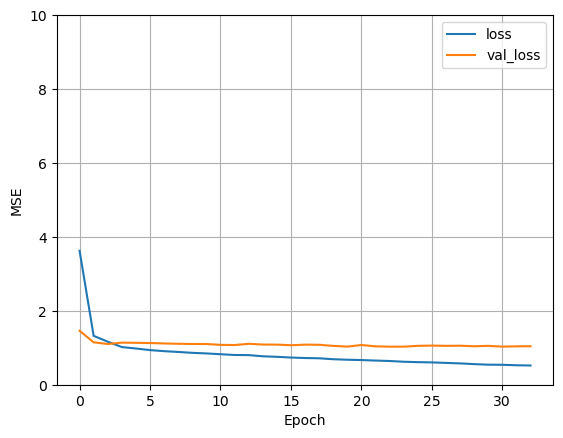

In [53]:
plot_loss(history)

In [54]:
y_pred_mlp_1 = mlp_1.predict(x_test)

9/9 [==============================] - 0s 0s/step


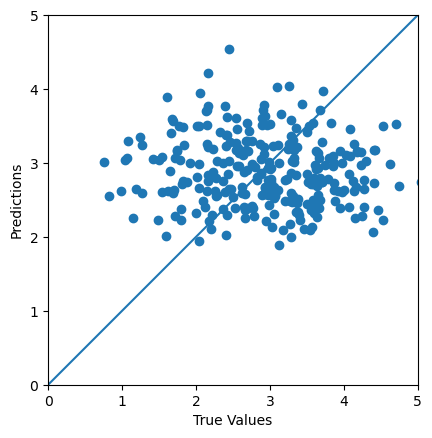

In [55]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_1)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


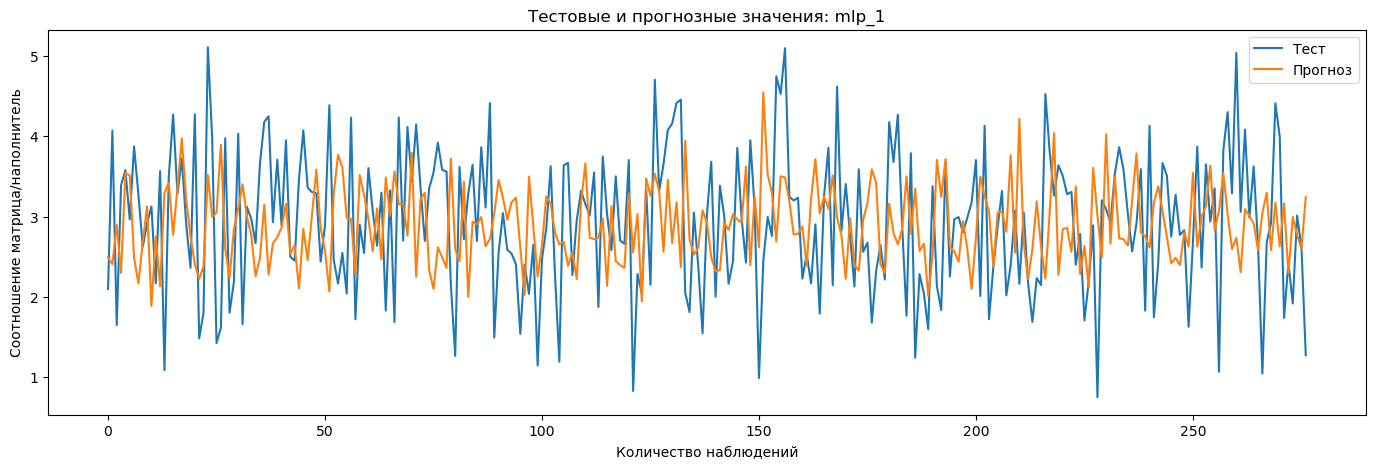

In [56]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_1.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_1')

In [57]:
df_mlp_1 = error(mlp_1, x_train, x_test, y_train, y_test,
    name = 'mlp_1', trg = 'Соотношение матрица-наполнитель')
df_mlp_1

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_1,Соотношение матрица-наполнитель,0.84296,0.669361,1.039481,0.699295,-0.359761


# Увеличим число слоев и изменим число нейронов

In [58]:
def build_and_compile_model(normalizer):
    model_2 = keras.Sequential([
      normalizer,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),  
      layers.Dense(1)
    ])

    model_2.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_2

In [59]:
mlp_2 = build_and_compile_model(normalizer)
mlp_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_7 (Dense)             (None, 32)                416       
                                                                 
 dense_8 (Dense)             (None, 64)                2112      
                                                                 
 dense_9 (Dense)             (None, 128)               8320      
                                                                 
 dense_10 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,002
Trainable params: 10,977
Non-trainable params: 25
_________________________________________________

In [60]:
%%time
history = mlp_2.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 9ms/step - loss: 5.5147 - val_loss: 1.6071
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6149 - val_loss: 1.2280
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2646 - val_loss: 1.2105
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1512 - val_loss: 1.1629
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0713 - val_loss: 1.1450
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.0210 - val_loss: 1.1339
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9797 - val_loss: 1.1184
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9752 - val_loss: 1.1212
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9221 - val_loss: 1.1315
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9020 - val_loss: 1.1117

In [61]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

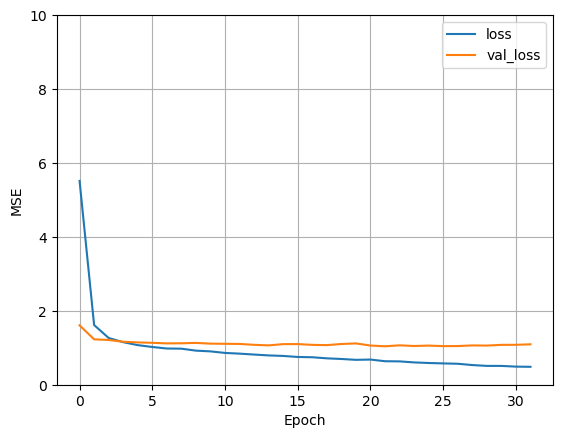

In [62]:
plot_loss(history)

In [63]:
y_pred_mlp_2 = mlp_2.predict(x_test)

9/9 [==============================] - 0s 0s/step


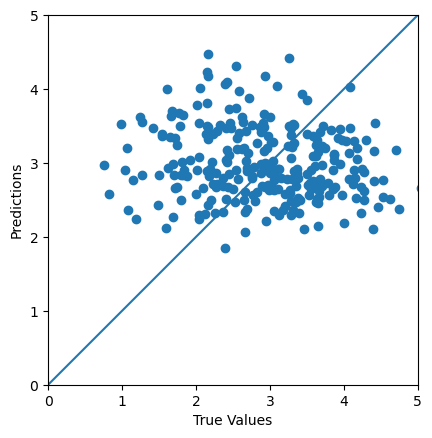

In [64]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


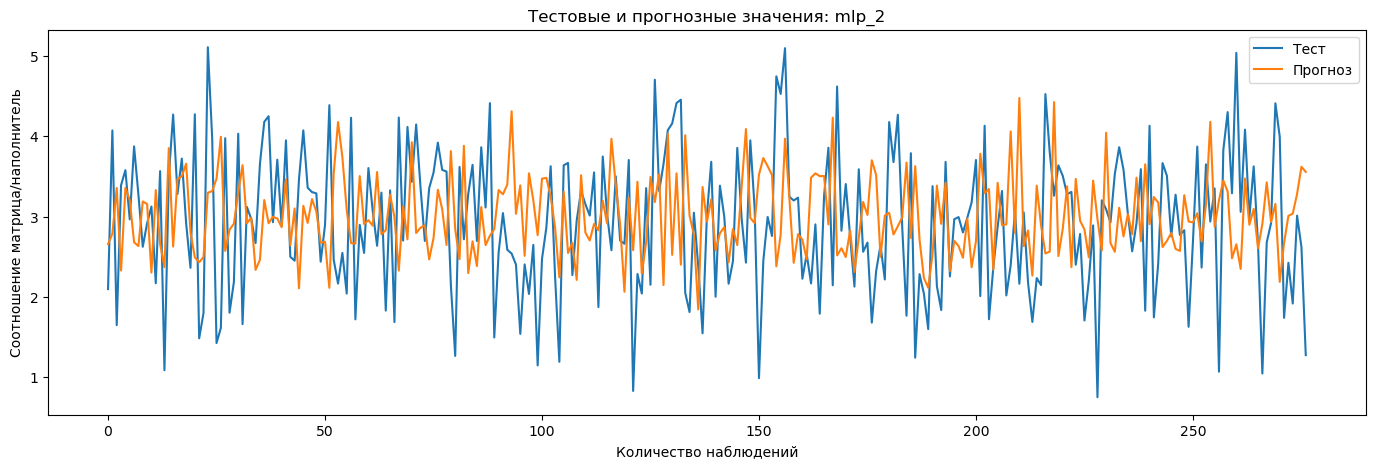

In [65]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_2.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_2')

In [66]:
df_mlp_2 = error(mlp_2, x_train, x_test, y_train, y_test,
    name = 'mlp_2', trg = 'Соотношение матрица-наполнитель')
df_mlp_2

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_2,Соотношение матрица-наполнитель,0.861006,0.671457,1.105257,0.699097,-0.445803


# число слоев оставим , изменим число нейронов

In [67]:
def build_and_compile_model(normalizer):
    model_3 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),  
      layers.Dense(1)
    ])

    model_3.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_3

In [68]:
mlp_3 = build_and_compile_model(normalizer)
mlp_3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_11 (Dense)            (None, 64)                832       
                                                                 
 dense_12 (Dense)            (None, 128)               8320      
                                                                 
 dense_13 (Dense)            (None, 256)               33024     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42,458
Trainable params: 42,433
Non-trainable params: 25
_________________________________________________

In [69]:
%%time
history = mlp_3.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 4.3518 - val_loss: 1.6544
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3188 - val_loss: 1.3009
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0151 - val_loss: 1.1684
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9381 - val_loss: 1.1451
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8926 - val_loss: 1.1292
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8554 - val_loss: 1.1356
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8224 - val_loss: 1.1085
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7852 - val_loss: 1.1865
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7647 - val_loss: 1.1318
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7253 - val_loss: 1.070

In [70]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

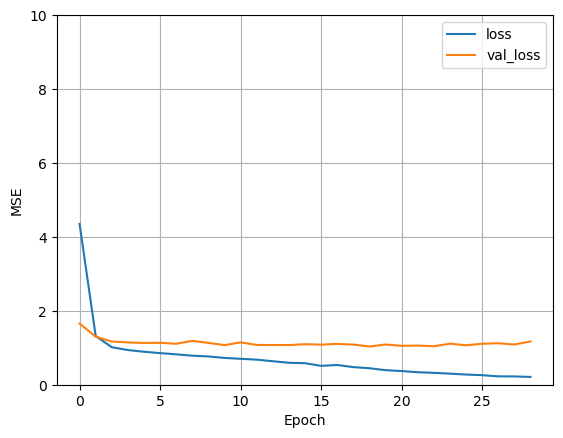

In [71]:
plot_loss(history)

In [72]:
y_pred_mlp_3 = mlp_3.predict(x_test)

9/9 [==============================] - 0s 0s/step


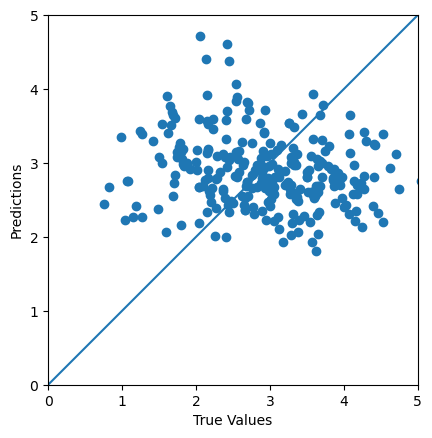

In [73]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 0s/step


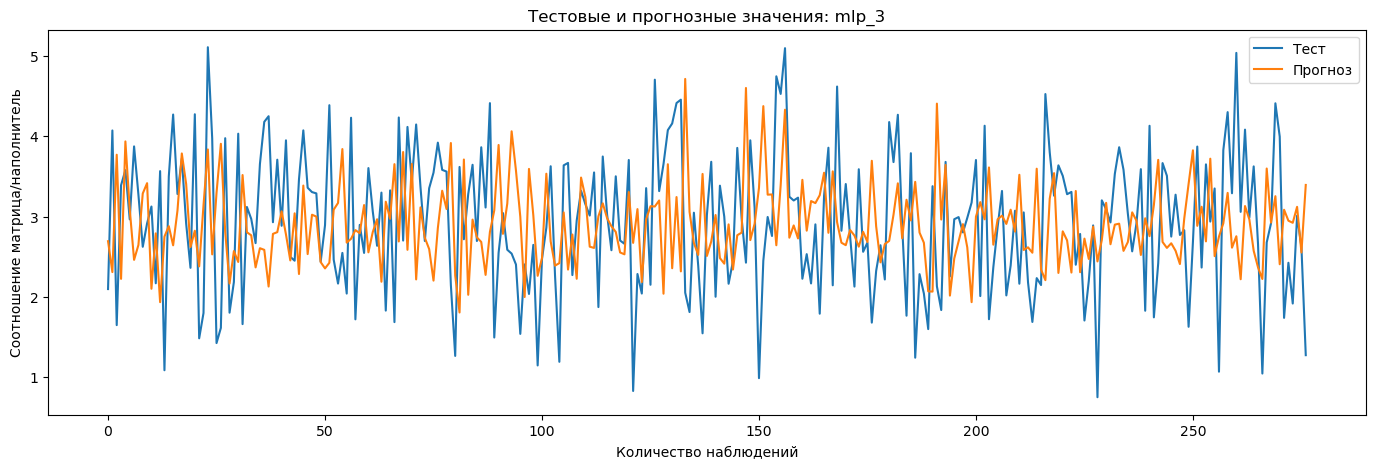

In [74]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_3.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_3')

In [75]:
df_mlp_3 = error(mlp_3, x_train, x_test, y_train, y_test,
    name = 'mlp_3', trg = 'Соотношение матрица-наполнитель')
df_mlp_3

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_3,Соотношение матрица-наполнитель,0.868866,0.560671,1.12006,0.513567,-0.465168


# Построим многослойную модель с теми же параметрами, но изменим оптимизатор на SGD

In [76]:
def build_and_compile_model(normalizer):
    model_4 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(1)
    ])

    model_4.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='mean_squared_error')
    return model_4


In [77]:
mlp_4 = build_and_compile_model(normalizer)
mlp_4.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_15 (Dense)            (None, 64)                832       
                                                                 
 dense_16 (Dense)            (None, 64)                4160      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,082
Trainable params: 5,057
Non-trainable params: 25
_________________________________________________________________


In [78]:
%%time
history = mlp_4.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 0s 8ms/step - loss: 8.7493 - val_loss: 6.9267
Epoch 2/1000
17/17 [==============================] - 0s 2ms/step - loss: 5.9389 - val_loss: 4.6762
Epoch 3/1000
17/17 [==============================] - 0s 2ms/step - loss: 4.0648 - val_loss: 3.1731
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 2.8434 - val_loss: 2.2295
Epoch 5/1000
17/17 [==============================] - 0s 2ms/step - loss: 2.0979 - val_loss: 1.6985
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.6854 - val_loss: 1.4053
Epoch 7/1000
17/17 [==============================] - 0s 2ms/step - loss: 1.4537 - val_loss: 1.2685
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.3366 - val_loss: 1.1985
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2689 - val_loss: 1.1575
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2214 - val_loss: 1.1326

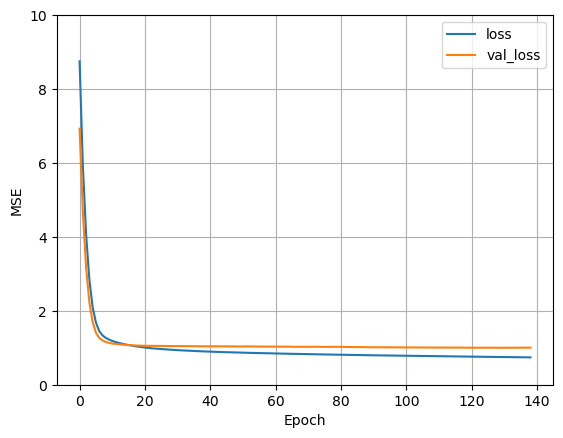

In [79]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)   

In [80]:
y_pred_mlp_4 = mlp_4.predict(x_test)



9/9 [==============================] - 0s 1ms/step


9/9 [==============================] - 0s 0s/step


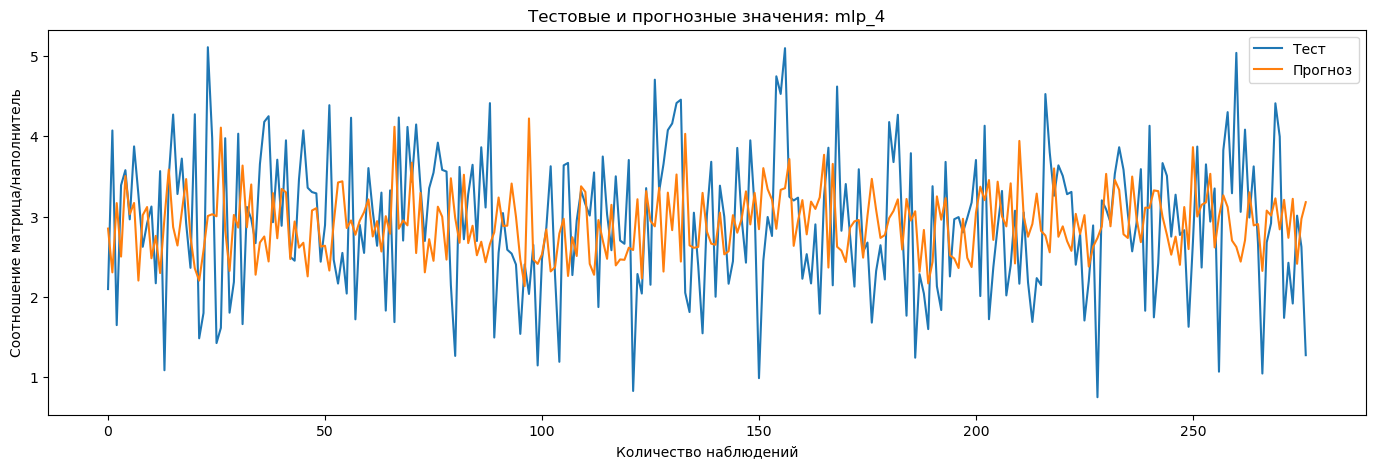

In [81]:
# Зададим функцию для визуализации факт/прогноз для результатов моделей
# Посмотрим на график результата работы модели
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_4.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_4')

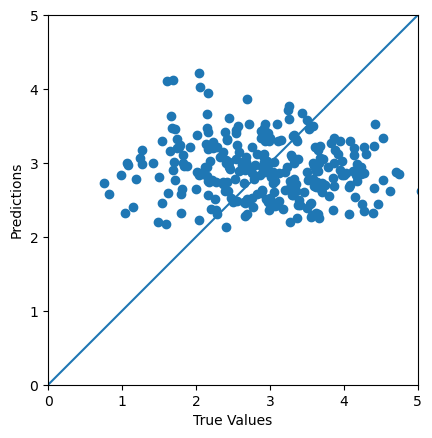

In [82]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_4)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

In [83]:
df_mlp_4 = error(mlp_4, x_train, x_test, y_train, y_test,
    name = 'mlp_4', trg = 'Соотношение матрица-наполнитель')
df_mlp_4

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_4,Соотношение матрица-наполнитель,0.821671,0.714738,0.987026,0.798285,-0.291144


In [84]:
def build_and_compile_model(normalizer):
    model_5 = keras.Sequential([
      normalizer,
      layers.Dense(32, activation='relu'),
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),  
      layers.Dense(1)
    ])

    model_5.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='mean_squared_error')
    return model_5

In [85]:
mlp_5 = build_and_compile_model(normalizer)
mlp_5.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_18 (Dense)            (None, 32)                416       
                                                                 
 dense_19 (Dense)            (None, 64)                2112      
                                                                 
 dense_20 (Dense)            (None, 128)               8320      
                                                                 
 dense_21 (Dense)            (None, 1)                 129       
                                                                 
Total params: 11,002
Trainable params: 10,977
Non-trainable params: 25
_________________________________________________

In [86]:
%%time
history = mlp_5.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 7.6742 - val_loss: 6.2819
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 5.2226 - val_loss: 4.2336
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 3.4512 - val_loss: 2.7746
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 2.2555 - val_loss: 1.9634
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.6296 - val_loss: 1.6093
Epoch 6/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.3667 - val_loss: 1.4562
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2526 - val_loss: 1.3925
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.2029 - val_loss: 1.3635
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.1773 - val_loss: 1.3407
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1561 - val_loss: 1.323

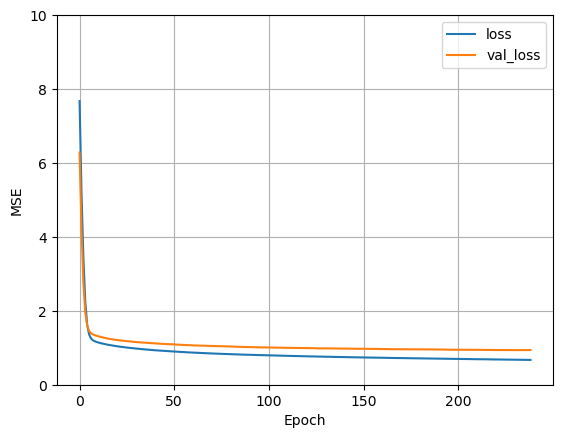

In [87]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [88]:
y_pred_mlp_5 = mlp_5.predict(x_test)

9/9 [==============================] - 0s 813us/step


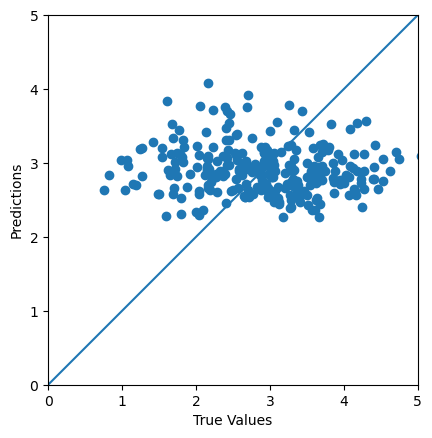

In [89]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_5 )
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


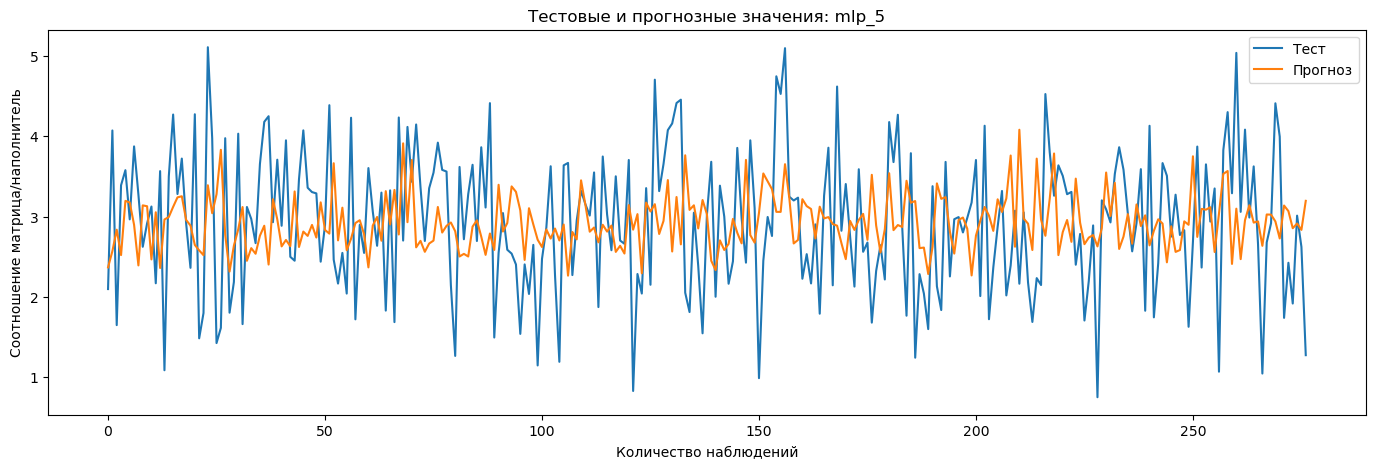

In [90]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_5.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_5')

In [91]:
df_mlp_5 = error(mlp_5, x_train, x_test, y_train, y_test,
    name = 'mlp_5', trg = 'Соотношение матрица-наполнитель')
df_mlp_5

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_5,Соотношение матрица-наполнитель,0.790174,0.689722,0.905471,0.728034,-0.184461


In [92]:
def build_and_compile_model(normalizer):
    model_6 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dense(128, activation='relu'),
      layers.Dense(256, activation='relu'),  
      layers.Dense(1)
    ])

    model_6.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_6

In [93]:
mlp_6 = build_and_compile_model(normalizer)
mlp_6.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_22 (Dense)            (None, 64)                832       
                                                                 
 dense_23 (Dense)            (None, 128)               8320      
                                                                 
 dense_24 (Dense)            (None, 256)               33024     
                                                                 
 dense_25 (Dense)            (None, 1)                 257       
                                                                 
Total params: 42,458
Trainable params: 42,433
Non-trainable params: 25
_________________________________________________

In [94]:
%%time
history = mlp_6.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 11ms/step - loss: 3.2542 - val_loss: 1.6618
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.1777 - val_loss: 1.2899
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9948 - val_loss: 1.2303
Epoch 4/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.9375 - val_loss: 1.1950
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8970 - val_loss: 1.1804
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8774 - val_loss: 1.1596
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8322 - val_loss: 1.2190
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.7786 - val_loss: 1.1711
Epoch 9/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7514 - val_loss: 1.2009
Epoch 10/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.7249 - val_loss: 1.179

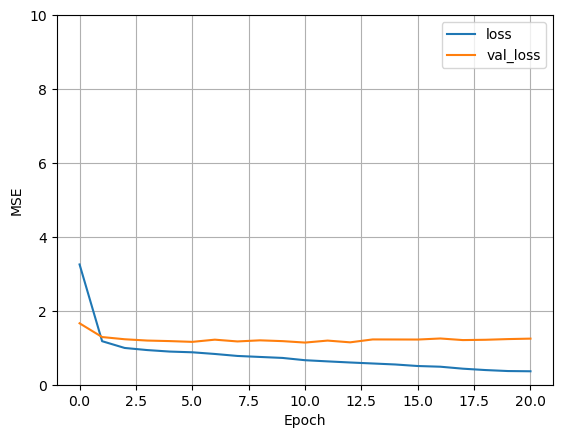

In [95]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [96]:
y_pred_mlp_6 = mlp_6.predict(x_test)

9/9 [==============================] - 0s 2ms/step


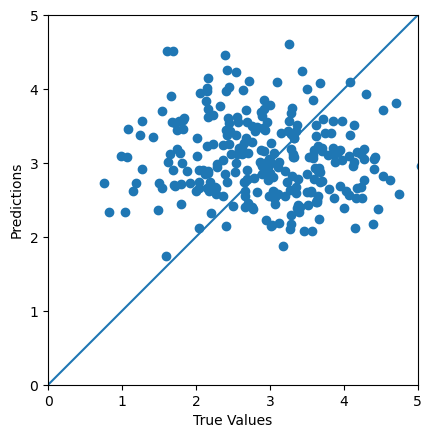

In [97]:
a = plt.axes(aspect='equal')
plt.scatter(y_test,y_pred_mlp_6  )
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


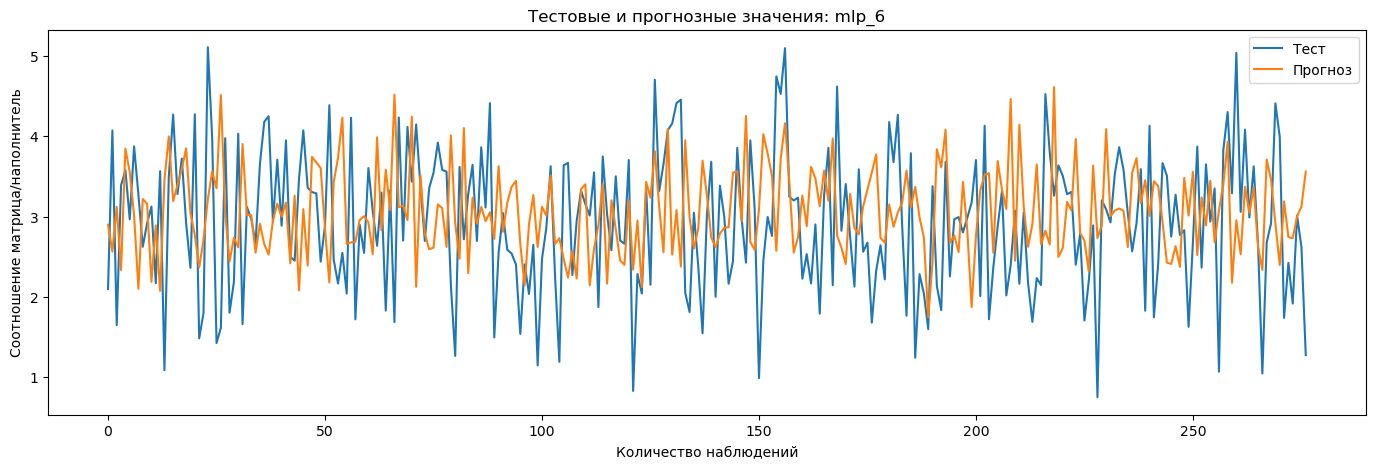

In [98]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_6.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_6')

In [99]:
df_mlp_6 = error(mlp_6, x_train, x_test, y_train, y_test,
    name = 'mlp_6', trg = 'Соотношение матрица-наполнитель')
df_mlp_6

9/9 [==============================] - 0s 814us/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_6,Соотношение матрица-наполнитель,0.881052,0.688248,1.13512,0.731736,-0.484868


In [100]:
df_mlp_result = pd.concat([df_mlp_1, df_mlp_2, df_mlp_3, df_mlp_4, df_mlp_5, df_mlp_6, ], axis=0).reset_index(drop = True)
df_mlp_result

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_1,Соотношение матрица-наполнитель,0.842960,0.669361,1.039481,0.699295,-0.359761
1,mlp_2,Соотношение матрица-наполнитель,0.861006,0.671457,1.105257,0.699097,-0.445803
2,mlp_3,Соотношение матрица-наполнитель,0.868866,0.560671,1.120060,0.513567,-0.465168
3,mlp_4,Соотношение матрица-наполнитель,0.821671,0.714738,0.987026,0.798285,-0.291144
4,mlp_5,Соотношение матрица-наполнитель,0.790174,0.689722,0.905471,0.728034,-0.184461
5,mlp_6,Соотношение матрица-наполнитель,0.881052,0.688248,1.135120,0.731736,-0.484868


# Добавим слой дропаут

In [101]:
def build_and_compile_model(normalizer):
    model_7 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_7.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_7

In [102]:
mlp_7 = build_and_compile_model(normalizer)
mlp_7.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_26 (Dense)            (None, 64)                832       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_27 (Dense)            (None, 128)               8320      
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_28 (Dense)            (None, 256)               33024     
                                                     

In [103]:
%%time
history = mlp_7.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 11ms/step - loss: 3.5270 - val_loss: 1.6140
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.2996 - val_loss: 1.4228
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.1807 - val_loss: 1.2416
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0723 - val_loss: 1.2019
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0137 - val_loss: 1.1725
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9556 - val_loss: 1.1681
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9301 - val_loss: 1.1604
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9175 - val_loss: 1.1452
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8491 - val_loss: 1.1137
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8499 - val_loss: 1.066

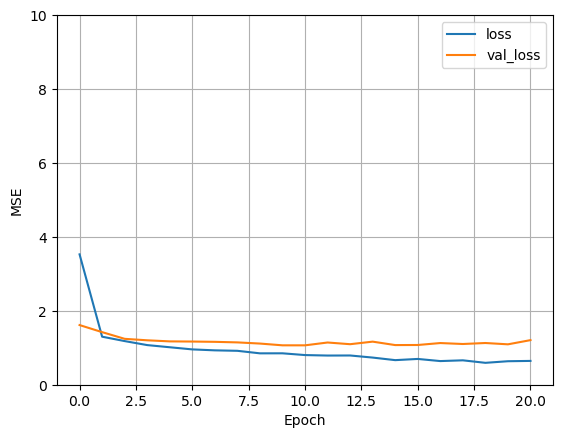

In [104]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [105]:
y_pred_mlp_7 = mlp_7.predict(x_test)

9/9 [==============================] - 0s 2ms/step


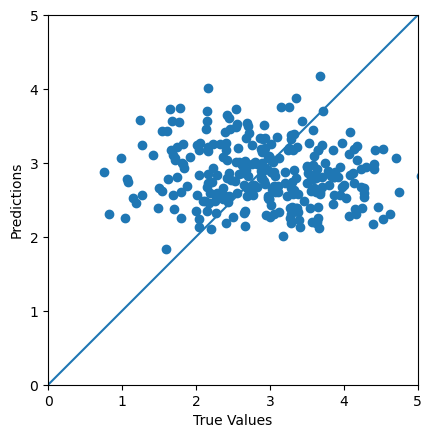

In [106]:
a = plt.axes(aspect='equal')
plt.scatter(y_test, y_pred_mlp_7)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

9/9 [==============================] - 0s 2ms/step


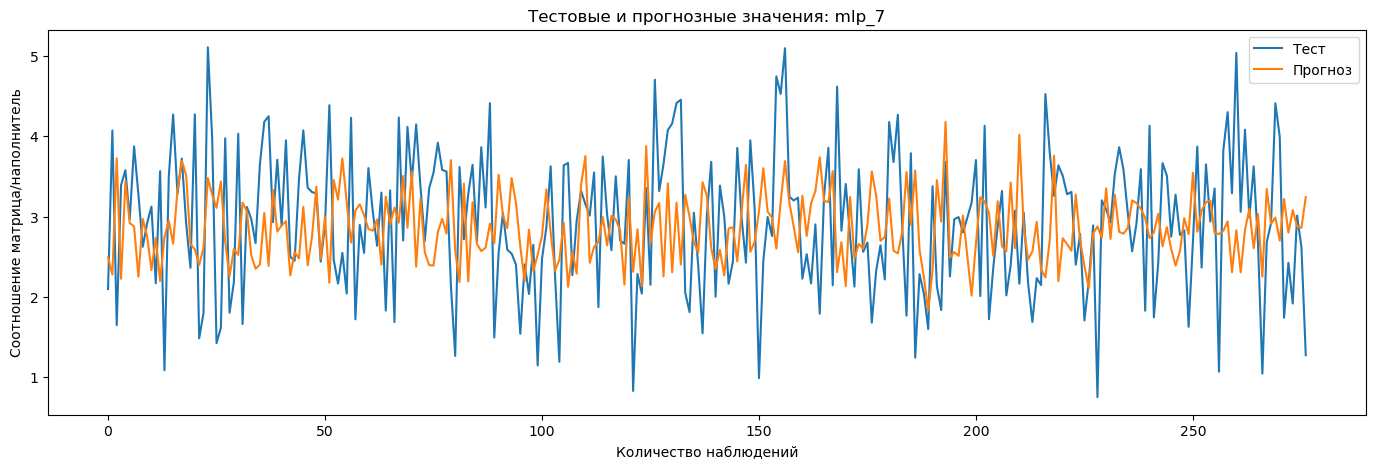

In [107]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_7.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_7')

In [108]:
df_mlp_7 = error(mlp_7, x_train, x_test, y_train, y_test,
    name = 'mlp_7', trg = 'Соотношение матрица-наполнитель')
df_mlp_7

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_7,Соотношение матрица-наполнитель,0.817151,0.689195,0.992198,0.745503,-0.297909


# Изменим функцию активации в скрытом слое

In [109]:
def build_and_compile_model(normalizer):
    model_9 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='sigmoid'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_9.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_9

In [110]:
mlp_9 = build_and_compile_model(normalizer)
mlp_9.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_30 (Dense)            (None, 64)                832       
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_31 (Dense)            (None, 128)               8320      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_32 (Dense)            (None, 256)               33024     
                                                     

In [111]:
%%time
history = mlp_9.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 11ms/step - loss: 2.1964 - val_loss: 0.8801
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8989 - val_loss: 0.8363
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8646 - val_loss: 0.8492
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8634 - val_loss: 0.8364
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8803 - val_loss: 0.8636
Epoch 6/1000
17/17 [==============================] - 0s 5ms/step - loss: 0.8611 - val_loss: 0.9325
Epoch 7/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8491 - val_loss: 0.8525
Epoch 8/1000
17/17 [==============================] - 0s 3ms/step - loss: 0.8506 - val_loss: 0.8452
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8134 - val_loss: 0.9518
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8722 - val_loss: 0.884

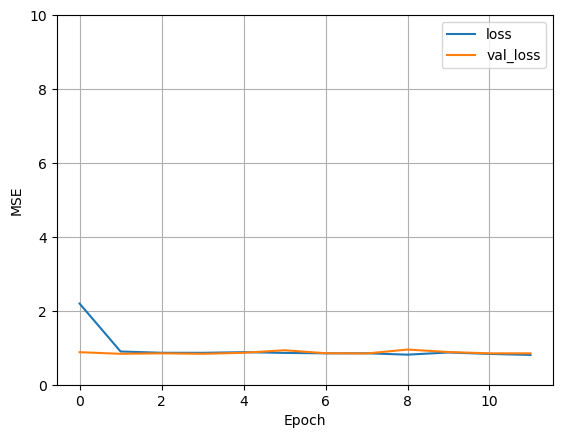

In [112]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [113]:
y_pred_mlp_9 = mlp_9.predict(x_test)

9/9 [==============================] - 0s 2ms/step


9/9 [==============================] - 0s 0s/step


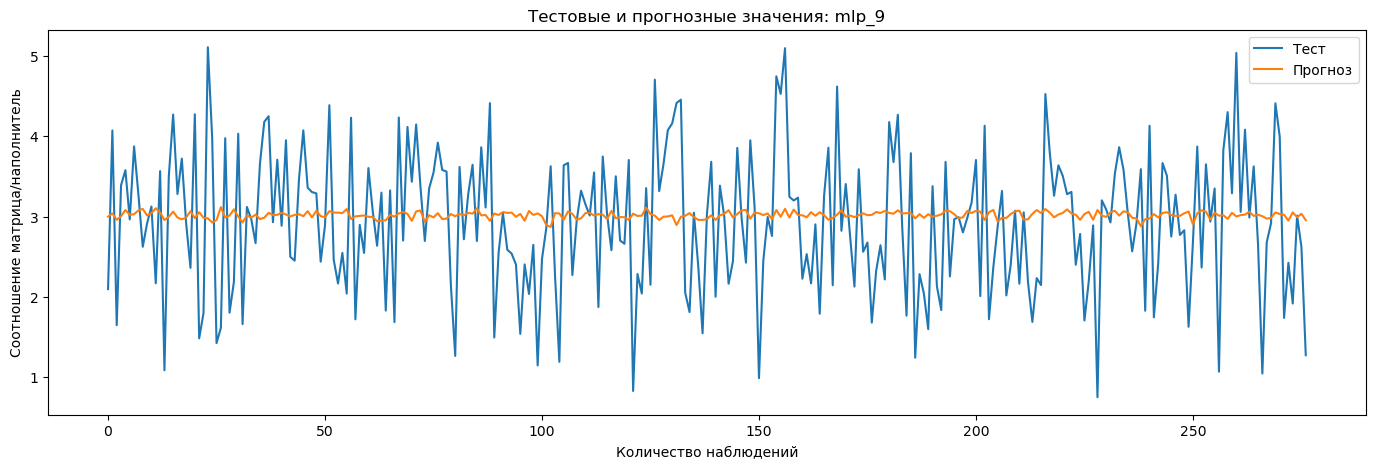

In [114]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_9.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_9')

In [115]:
df_mlp_9 = error(mlp_9, x_train, x_test, y_train, y_test,
    name = 'mlp_9', trg = 'Соотношение матрица-наполнитель')
df_mlp_9

9/9 [==============================] - 0s 0s/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_9,Соотношение матрица-наполнитель,0.713825,0.727068,0.776962,0.822633,-0.016355


In [116]:
def build_and_compile_model(normalizer):
    model_10 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='softmax'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='sigmoid'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_10.compile(optimizer=tf.keras.optimizers.SGD(0.001),
                loss='mean_squared_error')
    return model_10

In [117]:
mlp_10 = build_and_compile_model(normalizer)
mlp_10.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_34 (Dense)            (None, 64)                832       
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_35 (Dense)            (None, 128)               8320      
                                                                 
 dropout_7 (Dropout)         (None, 128)               0         
                                                                 
 dense_36 (Dense)            (None, 256)               33024     
                                                     

In [118]:
%%time
history = mlp_10.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 10ms/step - loss: 4.5760 - val_loss: 1.2384
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9784 - val_loss: 0.8680
Epoch 3/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8747 - val_loss: 0.8330
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8697 - val_loss: 0.8332
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8782 - val_loss: 0.8335
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8643 - val_loss: 0.8406
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8690 - val_loss: 0.8339
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8332 - val_loss: 0.8356
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8743 - val_loss: 0.8362
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9268 - val_loss: 0.833

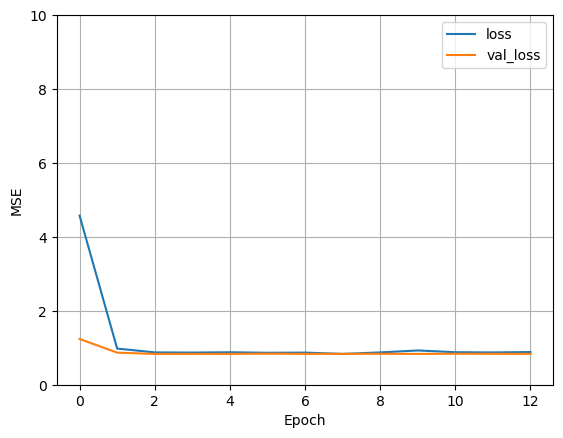

In [119]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [120]:
y_pred_mlp_10 = mlp_10.predict(x_test)

9/9 [==============================] - 0s 2ms/step


9/9 [==============================] - 0s 0s/step


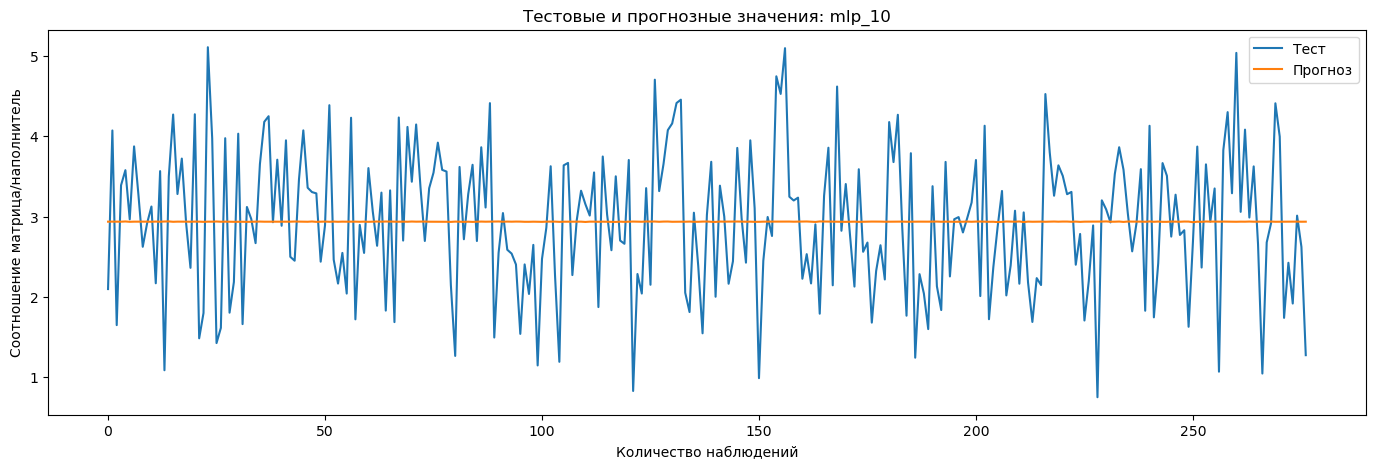

In [121]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_10.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_10')

In [122]:
df_mlp_10 = error(mlp_10, x_train, x_test, y_train, y_test,
    name = 'mlp_10', trg = 'Соотношение матрица-наполнитель')
df_mlp_10

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_10,Соотношение матрица-наполнитель,0.710387,0.721993,0.764572,0.816566,-0.000148


In [123]:
df_END = pd.concat([df_result, df_mlp_result, df_mlp_7,df_mlp_9,df_mlp_10], axis=0).reset_index(drop = True)
df_END

,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,model_1,Соотношение матрица-наполнитель,0.718846,0.727980,0.769704,0.832339,-0.006862
1,model_2,Соотношение матрица-наполнитель,0.711121,0.741844,0.756206,0.854804,0.010795
2,model_3,Соотношение матрица-наполнитель,0.746268,0.751420,0.828954,0.881878,-0.084367
3,model_4,Соотношение матрица-наполнитель,0.715961,0.719260,0.775988,0.809827,-0.015082
4,mlp_1,Соотношение матрица-наполнитель,0.842960,0.669361,1.039481,0.699295,-0.359761
5,mlp_2,Соотношение матрица-наполнитель,0.861006,0.671457,1.105257,0.699097,-0.445803
6,mlp_3,Соотношение матрица-наполнитель,0.868866,0.560671,1.120060,0.513567,-0.465168
7,mlp_4,Соотношение матрица-наполнитель,0.821671,0.714738,0.987026,0.798285,-0.291144
8,mlp_5,Соотношение матрица-наполнитель,0.790174,0.689722,0.905471,0.728034,-0.184461
9,mlp_6,Соотношение матрица-наполнитель,0.881052,0.688248,1.135120,0.731736,-0.484868


# Метод GridSearchCV для нейросети

In [124]:
def create_model_GSCV(lyrs=[32], act='softmax', optimizer='adam', dr=0.1):
    
    seed = 7
    np.random.seed(seed)
    tf.random.set_seed(seed)
    
    model_GSCV = Sequential()
    model_GSCV.add(Dense(lyrs[0], input_dim=x_train.shape[1], activation=act)) 
    for i in range(1,len(lyrs)):
        model_GSCV.add(Dense(lyrs[i], activation=act))
    
    model_GSCV.add(Dropout(dr))
    model_GSCV.add(Dense(1))  # выходной слой
    
    model_GSCV.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
 
    return model_GSCV

# Ищем оптимальное число epochs и размер batch_size

In [125]:
model_GSCV= KerasRegressor(build_fn=create_model_GSCV, verbose=0)

batch_size = [10, 20, 30, 40, 50]
epochs = [10, 50, 100]

param_grid = dict(batch_size=batch_size, epochs=epochs)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, n_jobs=1,cv=10)
grid_result = grid.fit(x_train, y_train)

#summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.821224 using {'batch_size': 10, 'epochs': 100}
-3.299298 (0.447570) with: {'batch_size': 10, 'epochs': 10}
-0.831215 (0.068940) with: {'batch_size': 10, 'epochs': 50}
-0.821224 (0.062896) with: {'batch_size': 10, 'epochs': 100}
-5.717728 (1.300960) with: {'batch_size': 20, 'epochs': 10}
-1.164103 (0.209991) with: {'batch_size': 20, 'epochs': 50}
-0.834081 (0.064314) with: {'batch_size': 20, 'epochs': 100}
-6.233018 (1.099995) with: {'batch_size': 30, 'epochs': 10}
-2.137219 (0.574105) with: {'batch_size': 30, 'epochs': 50}
-0.899505 (0.083991) with: {'batch_size': 30, 'epochs': 100}
-7.115469 (1.003307) with: {'batch_size': 40, 'epochs': 10}
-2.738080 (0.668054) with: {'batch_size': 40, 'epochs': 50}
-1.224353 (0.172646) with: {'batch_size': 40, 'epochs': 100}
-7.024797 (0.965049) with: {'batch_size': 50, 'epochs': 10}
-3.962270 (0.893006) with: {'batch_size': 50, 'epochs': 50}
-1.490331 (0.196473) with: {'batch_size': 50, 'epochs': 100}


# Ищем optimizer

In [126]:
model_GSCV = KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

optimizer = ['SGD', 'RMSprop',  'Adam', ]
param_grid = dict(optimizer=optimizer)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ......................................optimizer=SGD; total time=   6.1s
[CV] END ......................................optimizer=SGD; total time=   6.2s
[CV] END ......................................optimizer=SGD; total time=   6.4s
[CV] END ......................................optimizer=SGD; total time=   6.7s
[CV] END ......................................optimizer=SGD; total time=   6.0s
[CV] END ......................................optimizer=SGD; total time=   6.4s
[CV] END ......................................optimizer=SGD; total time=   6.3s
[CV] END ......................................optimizer=SGD; total time=   6.6s
[CV] END ......................................optimizer=SGD; total time=   6.5s
[CV] END ......................................optimizer=SGD; total time=   6.2s
[CV] END ..................................optimizer=RMSprop; total time=   5.9s
[CV] END ..................................optim

In [127]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.821385 using {'optimizer': 'RMSprop'}
-0.824207 (0.061265) with: {'optimizer': 'SGD'}
-0.821385 (0.063087) with: {'optimizer': 'RMSprop'}
-0.822261 (0.065578) with: {'optimizer': 'Adam'}


# Ищем колличество слоев

In [128]:
model_GSCV = KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

layers = [[64, 64], [32, 64, 128], [64, 128, 256]]
param_grid = dict(lyrs=layers)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits
[CV] END ......................................lyrs=[64, 64]; total time=   7.0s
[CV] END ......................................lyrs=[64, 64]; total time=   7.0s
[CV] END ......................................lyrs=[64, 64]; total time=   6.8s
[CV] END ......................................lyrs=[64, 64]; total time=   6.8s
[CV] END ......................................lyrs=[64, 64]; total time=   7.0s
[CV] END ......................................lyrs=[64, 64]; total time=   9.5s
[CV] END ......................................lyrs=[64, 64]; total time=   7.8s
[CV] END ......................................lyrs=[64, 64]; total time=   7.7s
[CV] END ......................................lyrs=[64, 64]; total time=   7.7s
[CV] END ......................................lyrs=[64, 64]; total time=   7.8s
[CV] END .................................lyrs=[32, 64, 128]; total time=   8.4s
[CV] END .................................lyrs=[

In [129]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.817829 using {'lyrs': [64, 128, 256]}
-0.818339 (0.061469) with: {'lyrs': [64, 64]}
-0.818046 (0.061630) with: {'lyrs': [32, 64, 128]}
-0.817829 (0.061702) with: {'lyrs': [64, 128, 256]}


# Ищем оптимальные параметры для слоев Dropout

In [130]:
model_GSCV =  KerasRegressor(build_fn=create_model_GSCV, epochs=100, batch_size=10, verbose=0)

drops = [0.0, 0.01, 0.05, 0.1, 0.2, 0.3, 0.5]
param_grid = dict(dr=drops)

grid = GridSearchCV(estimator=model_GSCV, param_grid=param_grid, cv=10, verbose=2)
grid_result = grid.fit(x_train, y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   6.6s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   6.7s
[CV] END .............................................dr=0.0; total time=   6.2s
[CV] END .............................................dr=0.0; total time=   8.4s
[CV] END .............................................dr=0.0; total time=   7.0s
[CV] END .............................................dr=0.0; total time=   6.5s
[CV] END .............................................dr=0.0; total time=   6.1s
[CV] END .............................................dr=0.0; total time=   7.6s
[CV] END ............................................dr=0.01; total time=   6.1s
[CV] END .......................................

In [131]:
# результаты
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.817912 using {'dr': 0.01}
-0.817945 (0.061471) with: {'dr': 0.0}
-0.817912 (0.061819) with: {'dr': 0.01}
-0.819497 (0.063015) with: {'dr': 0.05}
-0.821560 (0.062400) with: {'dr': 0.1}
-0.824801 (0.064003) with: {'dr': 0.2}
-0.824343 (0.064913) with: {'dr': 0.3}
-0.819914 (0.064602) with: {'dr': 0.5}


In [132]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Activation, Dense
from tensorflow.keras.layers import Dropout

In [133]:
def build_and_compile_model(normalizer):
    model_8 = keras.Sequential([
      normalizer,
      layers.Dense(64, activation='relu'),
      layers.Dropout(0.1),
      layers.Dense(128, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(256, activation='relu'),
      layers.Dropout(0.1),  
      layers.Dense(1)
    ])

    model_8.compile(optimizer=tf.keras.optimizers.Adam(0.001),
                loss='mean_squared_error')
    return model_8

In [134]:
mlp_8 = build_and_compile_model(normalizer)
mlp_8.summary()

Model: "sequential_297"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense_658 (Dense)           (None, 64)                832       
                                                                 
 dropout_293 (Dropout)       (None, 64)                0         
                                                                 
 dense_659 (Dense)           (None, 128)               8320      
                                                                 
 dropout_294 (Dropout)       (None, 128)               0         
                                                                 
 dense_660 (Dense)           (None, 256)               33024     
                                                    

In [135]:
%%time
history = mlp_8.fit(
    x_train,
    y_train,
    epochs=1000,
    verbose=1,
    callbacks=[callback],
    validation_split=0.2)

Epoch 1/1000
17/17 [==============================] - 1s 14ms/step - loss: 3.7026 - val_loss: 1.6097
Epoch 2/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.3423 - val_loss: 1.3772
Epoch 3/1000
17/17 [==============================] - 0s 3ms/step - loss: 1.1513 - val_loss: 1.2087
Epoch 4/1000
17/17 [==============================] - 0s 4ms/step - loss: 1.0929 - val_loss: 1.2018
Epoch 5/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9873 - val_loss: 1.1109
Epoch 6/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9832 - val_loss: 1.1591
Epoch 7/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9400 - val_loss: 1.1270
Epoch 8/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9178 - val_loss: 1.0897
Epoch 9/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.9542 - val_loss: 1.0921
Epoch 10/1000
17/17 [==============================] - 0s 4ms/step - loss: 0.8216 - val_loss: 1.090

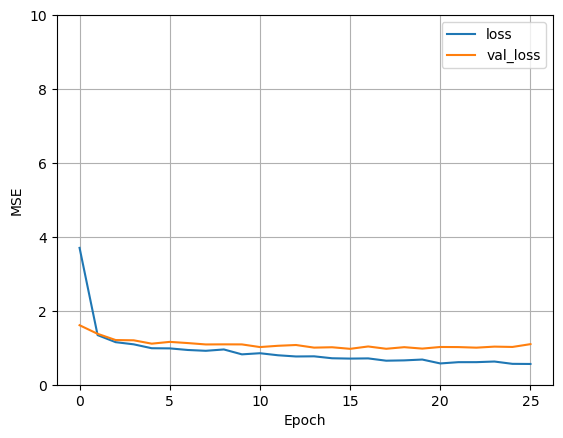

In [136]:
def plot_loss(history, lim = [0, 10]):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim(lim)
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)
plot_loss(history)

In [137]:
mlp_8.evaluate(x_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 1.0025


1.0024641752243042

9/9 [==============================] - 0s 2ms/step


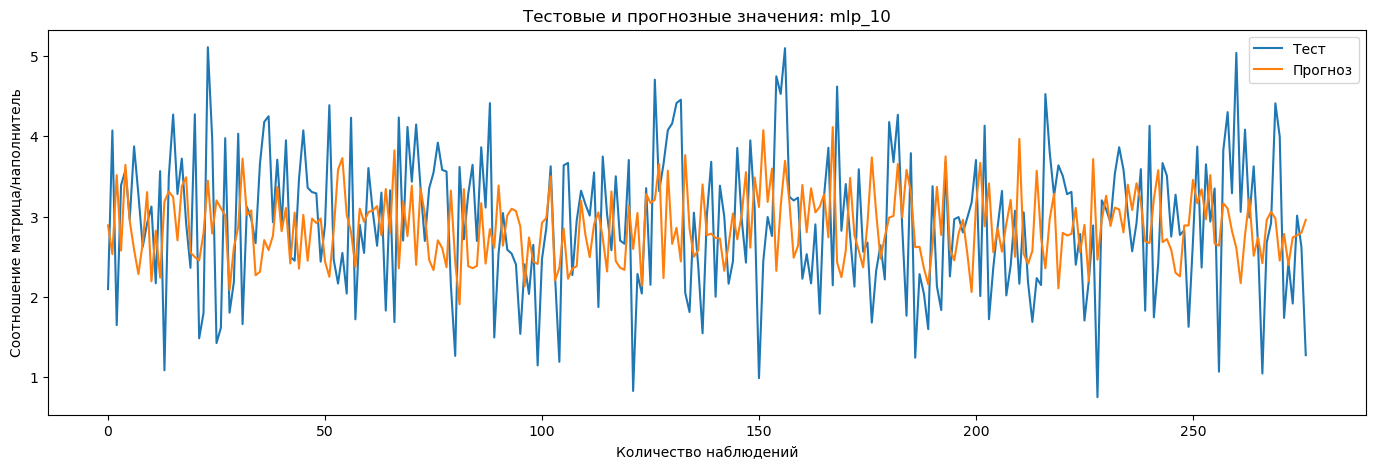

In [142]:
def actual_and_predicted_plot(orig, predict, var, model_name):    
    plt.figure(figsize=(17,5))
    plt.title(f'Тестовые и прогнозные значения: {model_name}')
    plt.plot(orig, label = 'Тест')
    plt.plot(predict, label = 'Прогноз')
    plt.legend(loc = 'best')
    plt.ylabel(var)
    plt.xlabel('Количество наблюдений')
    plt.show()
actual_and_predicted_plot(y_test.values, mlp_8.predict(x_test.values), 'Cоотношение матрица/наполнитель', 'mlp_10')

In [144]:
df_mlp_8 = error(mlp_8, x_train, x_test, y_train, y_test,
    name = 'mlp_8', trg = 'Соотношение матрица-наполнитель')
df_mlp_8

9/9 [==============================] - 0s 2ms/step


,model,Target param,MAE(test),MAE(train),MSE(test),MSE(train),R_Squared
0,mlp_8,Соотношение матрица-наполнитель,0.824951,0.65026,1.002464,0.657263,-0.311339


In [138]:
mlp_8.save('App/mlp_8/NEIRO_1')

INFO:tensorflow:Assets written to: App/mlp_8/NEIRO_1\assets


INFO:tensorflow:Assets written to: App/mlp_8/NEIRO_1\assets


In [139]:
mlp_8_loaded = keras.models.load_model('App/mlp_8/NEIRO_1')

In [140]:
mlp_8_loaded.evaluate(x_test, y_test)

9/9 [==============================] - 0s 1ms/step - loss: 1.0025


1.0024641752243042

In [141]:
print(tf.__version__)

2.11.0
